## We can interpret the whole hierarchical process to gain insights into the hidden structure of the network

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from iterative_searcher.iterative_searcher import IterativeSearcher
from dendro import Dendrogram

from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.samplers.regular.louvain_sampler import LouvainSamplers

### Karate network

In [5]:
G = nx.karate_club_graph()
num_runs = 50
resolution = 1
num_reads = 100

searcher = IterativeSearcher(AdvantageSampler(G, resolution=resolution, num_reads=num_reads, use_clique_embedding=True))
results = searcher.run_with_sampleset_info(num_runs=num_runs, save_results=False, saving_path=None, iterative_verbosity=0)

# results ---> ("communities", object), ("modularity", np.float_), ("time", np.float_), ("division_tree", object), ("division_modularities", object),
communities, modularity, time, dvision_tree, division_modularities = None, 0, None, None, None
for res in results:
    if res[1]>modularity:
        communities = res[0]
        modularity = res[1]
        time = res[2]
        division_tree = res[3]
        division_modularities = res[4]

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:28<00:00,  9.48s/it]


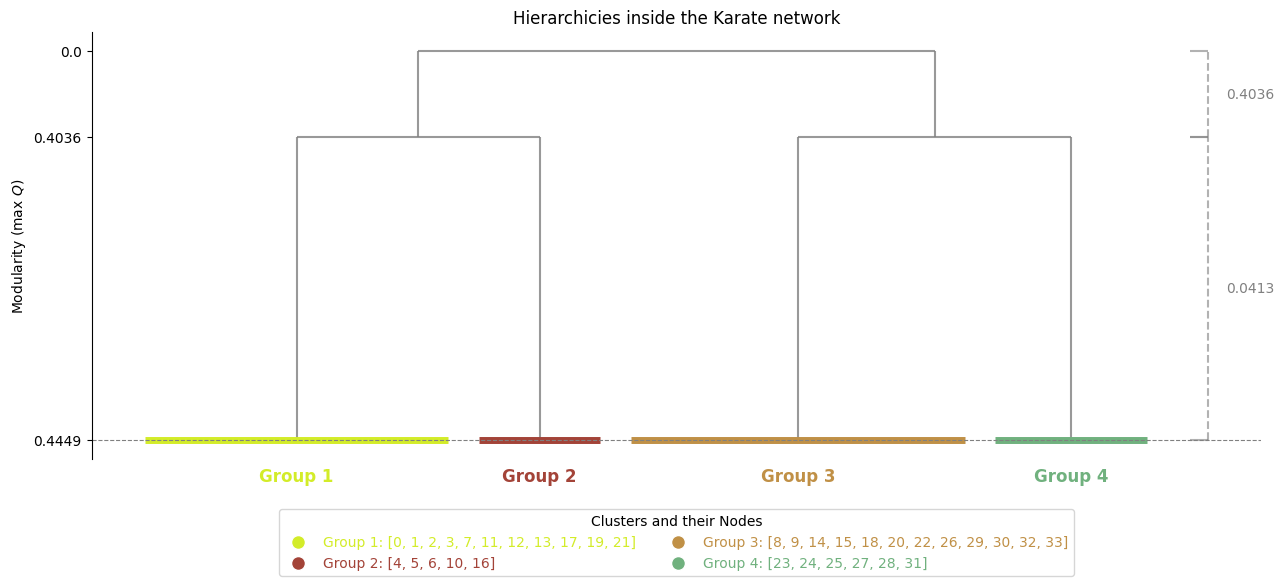

In [6]:
dendro = Dendrogram(G, communities, division_modularities, division_tree)
fig, ax = plt.subplots(1,1,figsize=(13,6))

dendro.draw(
    display_leafs=False,
    yaxis_abs_log=True,
    ax=ax,
    fig=fig,
    communities_labels=["Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6", "Group 7", "Group 8"],
    fig_saving_path="./Karate/dendrogram.svg",
    title='Hierarchicies inside the Karate network'
)

### Power-law clustered network

In [3]:
num_runs = 20
G = nx.powerlaw_cluster_graph(n=100, m=1, p=0.1)
resolution = 1
num_reads = 100

searcher = IterativeSearcher(AdvantageSampler(G, resolution=resolution, num_reads=num_reads, use_clique_embedding=True))
results = searcher.run_with_sampleset_info(num_runs=num_runs, save_results=False, saving_path=None, iterative_verbosity=0)

# results ---> ("communities", object), ("modularity", np.float_), ("time", np.float_), ("division_tree", object), ("division_modularities", object),
communities, modularity, time, dvision_tree, division_modularities = None, 0, None, None, None
for res in results:
    if res[1]>modularity:
        communities = res[0]
        modularity = res[1]
        time = res[2]
        division_tree = res[3]
        division_modularities = res[4]

100%|████████████████████████████████████████████████████████████████████████████████████████| 20/20 [09:02<00:00, 27.13s/it]


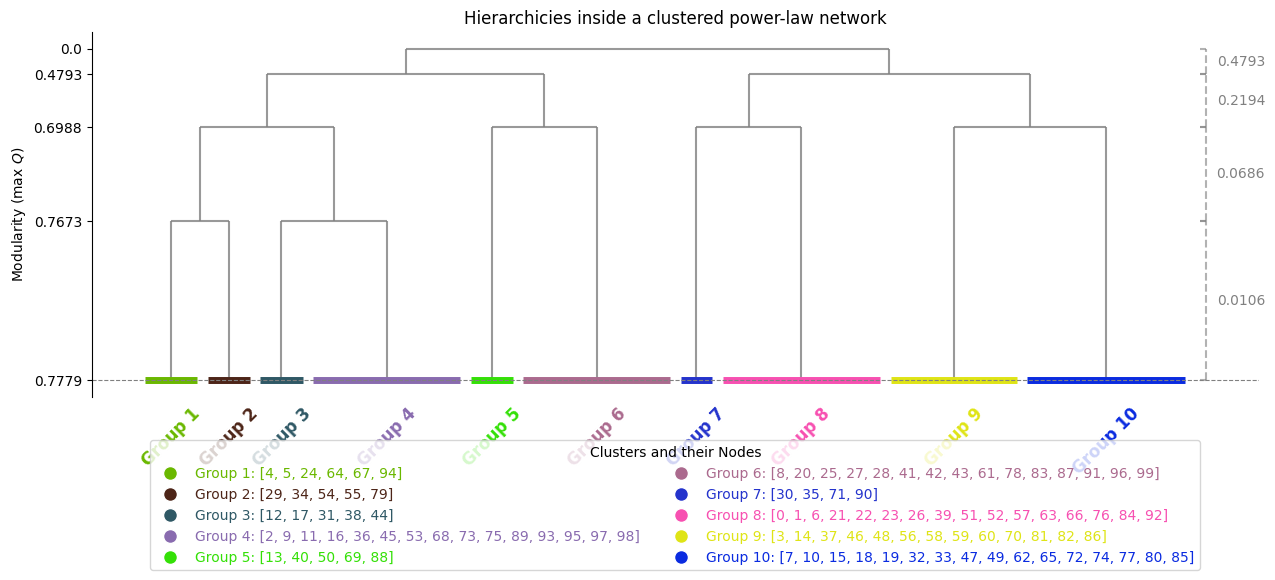

In [4]:
dendro = Dendrogram(G, communities, division_modularities, division_tree)
fig, ax = plt.subplots(1,1,figsize=(13,6))
community_labels = [f"Group {i+1}" for i in range(len(communities))]
dendro.draw(
    display_leafs=False,
    yaxis_abs_log=True,
    ax=ax,
    fig=fig,
    communities_labels=community_labels,
    xlabel_rotation=45,
    color_seed=1,
    fig_saving_path="./Power-law/dendrogram_100.svg",
    title='Hierarchicies inside a clustered power-law network'
)

In [5]:
_, ms, _ = IterativeSearcher(LouvainSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Louvain modularity:", ms.max())
_, ms, _ = IterativeSearcher(LeidenSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Leiden modularity:", ms.max())

100%|███████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 162.47it/s]


Louvain modularity: 0.7778798081828385


100%|███████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 761.88it/s]

Leiden modularity: 0.7778798081828385


### Barabasi-Albert preferential attachment network

In [2]:
G = nx.barabasi_albert_graph(n=70, m=28)
num_runs = 10
resolution = 1
num_reads = 100

searcher = IterativeSearcher(AdvantageSampler(G, resolution=resolution, num_reads=num_reads, use_clique_embedding=True))
results = searcher.run_with_sampleset_info(num_runs=num_runs, save_results=False, saving_path=None, iterative_verbosity=0)

# results ---> ("communities", object), ("modularity", np.float_), ("time", np.float_), ("division_tree", object), ("division_modularities", object),
communities, modularity, time, dvision_tree, division_modularities = None, 0, None, None, None
for res in results:
    if res[1]>modularity:
        communities = res[0]
        modularity = res[1]
        time = res[2]
        division_tree = res[3]
        division_modularities = res[4]

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.80s/it]


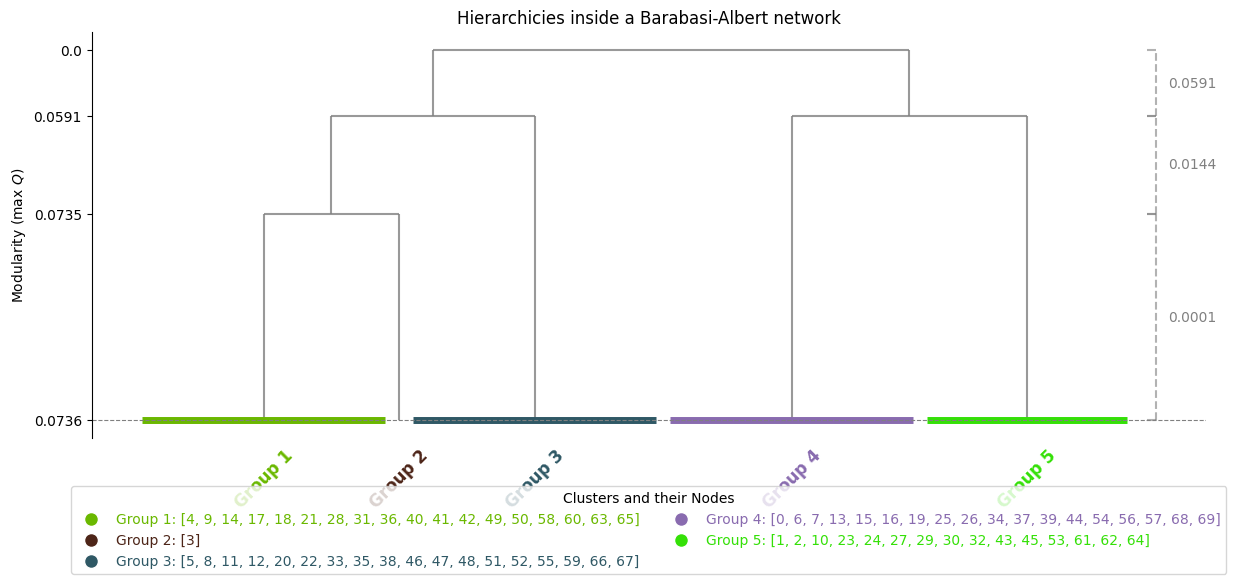

In [5]:
dendro = Dendrogram(G, communities, division_modularities, division_tree)
fig, ax = plt.subplots(1,1,figsize=(13,6))
community_labels = [f"Group {i+1}" for i in range(len(communities))]
dendro.draw(
    display_leafs=False,
    yaxis_abs_log=True,
    ax=ax,
    fig=fig,
    communities_labels=community_labels,
    xlabel_rotation=45,
    color_seed=1,
    fig_saving_path="./BA/dendrogram.svg",
    title='Hierarchicies inside a Barabasi-Albert network'
)

In [4]:
_, ms, _ = IterativeSearcher(LouvainSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Louvain modularity:", ms.max())
_, ms, _ = IterativeSearcher(LeidenSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Leiden modularity:", ms.max())

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 146.20it/s]


Louvain modularity: 0.07608989599241056


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 232.27it/s]

Leiden modularity: 0.06984466830950065


### Erdos-Renyi random networks

In [8]:
G = nx.erdos_renyi_graph(n=70, p=0.4)

searcher = IterativeSearcher(AdvantageSampler(G, resolution=resolution, num_reads=num_reads, use_clique_embedding=True))
results = searcher.run_with_sampleset_info(num_runs=num_runs, save_results=False, saving_path=None, iterative_verbosity=0)

# results ---> ("communities", object), ("modularity", np.float_), ("time", np.float_), ("division_tree", object), ("division_modularities", object),
communities, modularity, time, dvision_tree, division_modularities = None, 0, None, None, None
for res in results:
    if res[1]>modularity:
        communities = res[0]
        modularity = res[1]
        time = res[2]
        division_tree = res[3]
        division_modularities = res[4]

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [31:23<00:00, 37.66s/it]


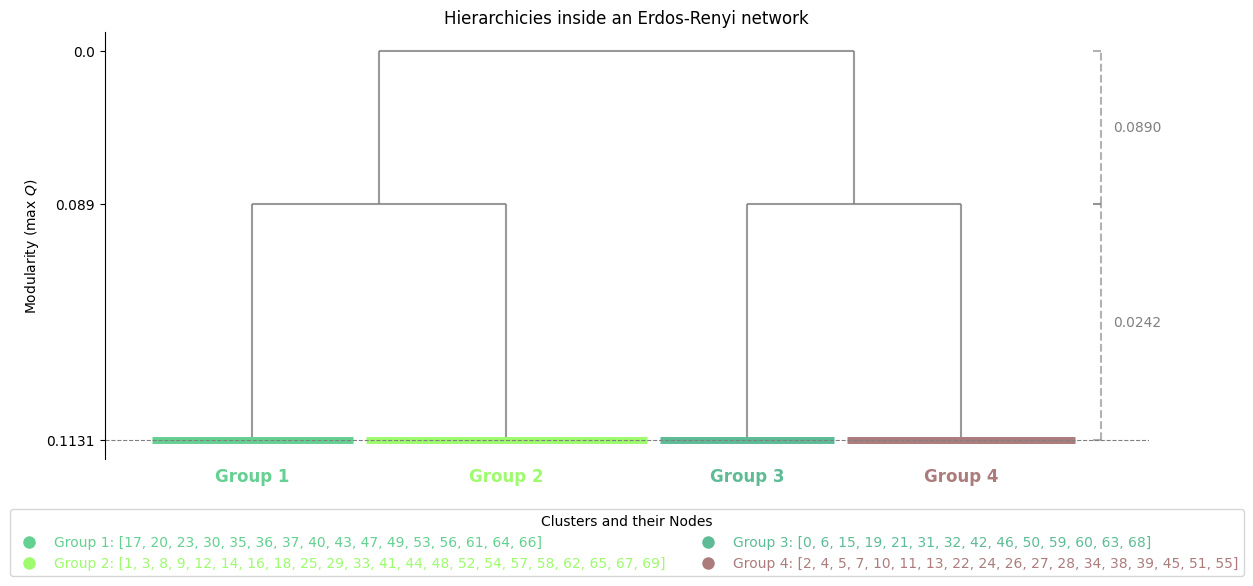

In [9]:
dendro = Dendrogram(G, communities, division_modularities, division_tree)
fig, ax = plt.subplots(1,1,figsize=(13,6))

dendro.draw(
    display_leafs=False,
    yaxis_abs_log=True,
    ax=ax,
    fig=fig,
    communities_labels=["Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6", "Group 7", "Group 8"],
    fig_saving_path="./ER/dendrogram.svg",
    title='Hierarchicies inside an Erdos-Renyi network'
)

In [12]:
_, ms, _ = IterativeSearcher(LouvainSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Louvain modularity:", ms.max())
_, ms, _ = IterativeSearcher(LeidenSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Leiden modularity:", ms.max())

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 102.97it/s]


Louvain modularity: 0.11888576437352266


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 289.88it/s]

Leiden modularity: 0.10219258684967641


### Directed scale-free networks

In [17]:
G = nx.scale_free_graph(n=50, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0)
num_runs = 20
resolution = 1
num_reads = 100

searcher = IterativeSearcher(AdvantageSampler(G, resolution=resolution, num_reads=num_reads, use_clique_embedding=True))
results = searcher.run_with_sampleset_info(num_runs=num_runs, save_results=False, saving_path=None, iterative_verbosity=0)

# results ---> ("communities", object), ("modularity", np.float_), ("time", np.float_), ("division_tree", object), ("division_modularities", object),
communities, modularity, time, dvision_tree, division_modularities = None, 0, None, None, None
for res in results:
    if res[1]>modularity:
        communities = res[0]
        modularity = res[1]
        time = res[2]
        division_tree = res[3]
        division_modularities = res[4]

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [06:47<00:00, 20.38s/it]


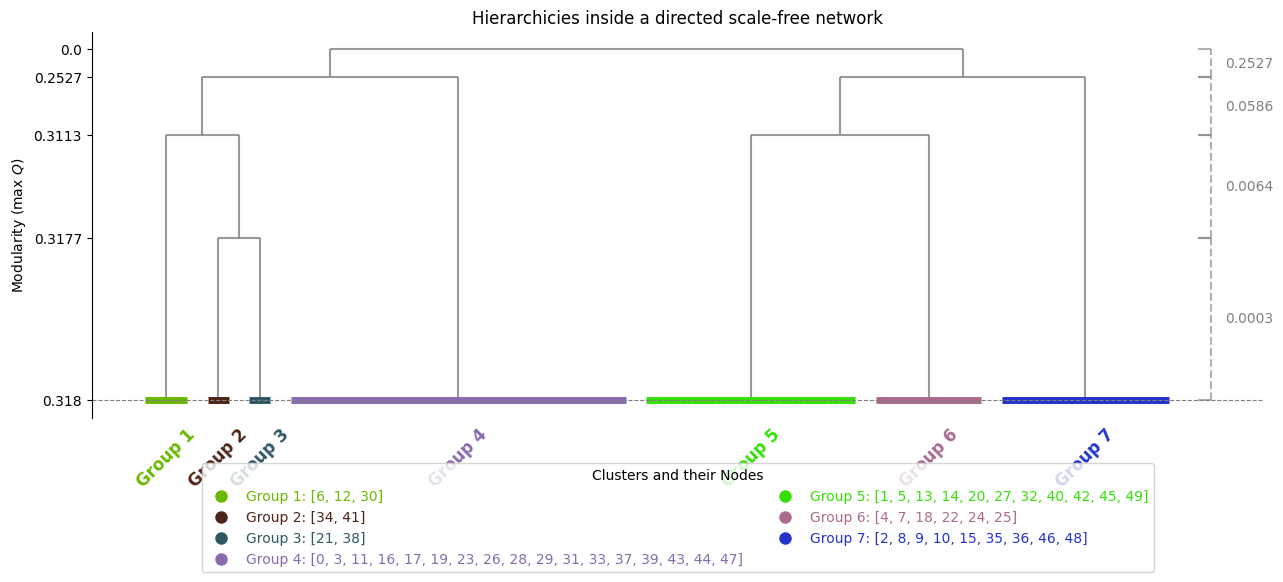

In [18]:
dendro = Dendrogram(G, communities, division_modularities, division_tree)
fig, ax = plt.subplots(1,1,figsize=(13,6))
community_labels = [f"Group {i+1}" for i in range(len(communities))]
dendro.draw(
    display_leafs=False,
    yaxis_abs_log=True,
    ax=ax,
    fig=fig,
    xlabel_rotation=45,
    color_seed=1,
    communities_labels=community_labels,
    fig_saving_path="./DSF/dendrogram.svg",
    title='Hierarchicies inside a directed scale-free network'
)

In [19]:
_, ms, _ = IterativeSearcher(LouvainSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Louvain modularity:", ms.max())
_, ms, _ = IterativeSearcher(LeidenSampler(G, resolution=resolution)).run(num_runs=num_runs, save_results=False)
print("Leiden modularity:", ms.max())

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 218.42it/s]


Louvain modularity: 0.3197542294419662


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 950.90it/s]

Leiden modularity: 0.3197542294419662
